In [1]:
import pytreenet as ptn
import numpy as np
import matplotlib.pyplot as plt

# Exact (Qutip)

In [6]:
# System initialization
Lx = 4
Ly = 4
spin = 0.5
t = 1

Jx =  1.5   * t
Jy =  0.5 * t
Jz =  -4  * t
h =   2   * t
periodic = True

system = ptn.AnisotropicHeisenberg2D_Qutip( Lx, Ly, spin, Jx, Jy, Jz, h, periodic)

# Create initial state
black_state = np.array([0,1])
white_state = np.array([1,0])
psi0 = system.alternating_product_state(black_state, white_state, pattern= "checkerboard")
#psi0 = system.uniform_product_state([1, 0])

# Evolve system
end_time = t
dt = 0.01
result = system.evolve_system(psi0, end_time=end_time, dt=dt)

In [44]:
import pickle
import pandas as pd
from tabulate import tabulate

# Load the Pickle file
with open('tdvp_profiling_data.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

# Extract profiling data (not profiling details)
profiling_data = loaded_data['profiling_data']

# Compute scores using the profiling_data
# Ensure ptn.compute_scores is compatible with this structure
scored_data = ptn.compute_scores(profiling_data, alpha=0, beta=1, gamma=0)

# Convert the scored data to a DataFrame for display
scored_df = pd.DataFrame(scored_data)

# Sort the DataFrame by the 'Score' column in descending order
scored_df = scored_df.sort_values(by='Score', ascending=False)

# Display the top configurations
print("\n=== Top Configurations ===")
print(tabulate(scored_df, headers='keys', tablefmt='pretty'))



=== Top Configurations ===
+-----+------------+--------------------+-------------------------+--------------------+-----------------------+------------------------------+---------------------+--------------------+--------------------+
|     | Config_ID  |   Running_Time_s   | update_tree_cache_calls |        WPLI        |  Norm_Running_Time_s  | Norm_update_tree_cache_calls |      Norm_WPLI      |       Score        |  Normalized_Score  |
+-----+------------+--------------------+-------------------------+--------------------+-----------------------+------------------------------+---------------------+--------------------+--------------------+
|  2  |  Config 3  | 3.794335126876831  |           40            | 15.982390020356785 |  0.39910331508266056  |             1.0              | 0.7161144817959437  |        1.0         |        1.0         |
| 119 | Config 120 | 4.127983808517456  |           40            | 16.767859787264808 |   0.440323263239612   |             1.0            

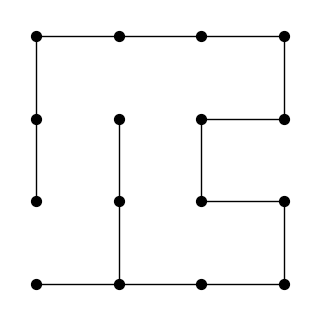

In [45]:
# Load the Pickle file
with open('tdvp_profiling_data.pkl', 'rb') as f:
    profiling_data = pickle.load(f)

# Extract profiling details from the loaded data
profiling_details = profiling_data['profiling_details']

config_id = 'Config 8'
ttn = profiling_details[config_id]['Spanning_tree']
ptn.Visualize_tree(profiling_details[config_id]['tree_dict'],6)  

In [40]:
black_state = np.array([0,1])
white_state = np.array([1,0])
ttn = ptn.alternating_product_state(ttn, black_state, white_state, bond_dim = 1,  pattern = "checkerboard")
#local_state = np.array([0,1])
#ttn = ptn.uniform_product_state(ttn ,local_state, bond_dim= 3)

Lx = 4
Ly = 4
J_x =  1.5 * t
J_y =  0.5 * t
J_z =  -4  * t
h_z = 2 * t

H1 = ptn.Anisotropic_Heisenberg_ham(J_x, J_y, J_z, h_z, Lx, Ly , boundary_condition = "periodic")
H1 = H1.pad_with_identities(ttn , symbolic= True)
ttno = ptn.TTNO.from_hamiltonian(H1, ttn)

SCF = ptn.spatial_correlation_function_sz(Lx, Ly, dist = 2, dim = 2, mode = "HV")
SCF = SCF.pad_with_identities(ttn, symbolic= True)
SCF = ptn.TTNO.from_hamiltonian(SCF, ttn)

M = ptn.total_magnetization(Lx, Ly, dim = 2)
M = M.pad_with_identities(ttn, symbolic= True)
M = ptn.TTNO.from_hamiltonian(M, ttn)

In [41]:
expansion_params = {"ExpansionMode": ptn.ExpansionMode.TTN,
                    "num_vecs": 3, 
                    "tau": 0.01,
                    "SVDParameters": ptn.SVDParameters(max_bond_dim = np.inf , rel_tol= -np.inf , total_tol = -np.inf),
                    "expansion_steps" : 10,
                    "tol": 0.2,
                    "tol_step_increase": 0.08,
                    "tol_step_decrease": 0.01,
                    "num_second_trial" : 10,
                    "max_bond": 120,
                    "rel_tot_bond": (5,20)}


config= ptn.TTNTimeEvolutionConfig(record_bond_dim = True,
                                   Expansion_params = expansion_params)

tdvp = ptn.SecondOrderOneSiteTDVP(initial_state = ttn,
                                 hamiltonian = ttno,
                                 time_step_size = 0.01,
                                 final_time = t,
                                 operators = [SCF,M],
                                 config = config)

In [ ]:
tdvp = ptn.SecondOrderTwoSiteTDVP(initial_state = ttn,
                                 hamiltonian = ttno,
                                 time_step_size = 0.01,
                                 final_time = 2,
                                 operators = SCF,
                                 truncation_parameters= ptn.SVDParameters(max_bond_dim = np.inf, rel_tol= 1e-3, total_tol = -np.inf),
                                 config = config)
tdvp.run(evaluation_time = 2)

In [42]:
tdvp.RUN(evaluation_time = 2 , filepath = r"C:\Users\edpou\Desktop\Ed\PyTreeNet-Project_09\PyTreeNet\results\1" )

 10%|▉         | 10/101 [00:01<00:08, 10.61it/s]

SVD MAX: 3
Initial tol: 0.2
Phase 1 - Trial 1:
Expanded dim (29) > rel_tot_bond ((5, 20))
Increasing tol: 0.28
Phase 1 - Trial 2:
Expanded dim (26) > rel_tot_bond ((5, 20))
Increasing tol: 0.36000000000000004
Phase 1 - Trial 3:
Expanded dim (21) > rel_tot_bond ((5, 20))
Increasing tol: 0.44000000000000006
Phase 1 - Trial 4:
Expanded dim (21) > rel_tot_bond ((5, 20))
Increasing tol: 0.52
Acceptable expansion found in Phase 1: 17
Final expanded_dim: 17 : 45 ---> 62


 21%|██        | 21/101 [00:04<00:19,  4.10it/s]

SVD MAX: 10
Initial tol: 0.52


 22%|██▏       | 22/101 [00:06<00:48,  1.64it/s]

Acceptable expansion found in initial attempt: 7
Final expanded_dim: 7 : 62 ---> 69


 32%|███▏      | 32/101 [00:09<00:18,  3.75it/s]

SVD MAX: 9
Initial tol: 0.52


 33%|███▎      | 33/101 [00:10<00:42,  1.60it/s]

Acceptable expansion found in initial attempt: 9
Final expanded_dim: 9 : 69 ---> 78


 43%|████▎     | 43/101 [00:14<00:23,  2.42it/s]

SVD MAX: 12
Initial tol: 0.52
Phase 1 - Trial 1:
Expanded dim (22) > rel_tot_bond ((5, 20))
Increasing tol: 0.6
Phase 1 - Trial 2:
Expanded dim (21) > rel_tot_bond ((5, 20))
Increasing tol: 0.6799999999999999


 44%|████▎     | 44/101 [00:21<02:04,  2.18s/it]

Acceptable expansion found in Phase 1: 14
Final expanded_dim: 14 : 78 ---> 92


 53%|█████▎    | 54/101 [00:29<00:39,  1.20it/s]

SVD MAX: 15
Initial tol: 0.6799999999999999


 54%|█████▍    | 55/101 [00:33<01:19,  1.73s/it]

Acceptable expansion found in initial attempt: 13
Final expanded_dim: 13 : 92 ---> 105


 64%|██████▍   | 65/101 [00:47<00:53,  1.48s/it]

SVD MAX: 17
Initial tol: 0.6799999999999999


 65%|██████▌   | 66/101 [00:53<01:33,  2.66s/it]

Acceptable expansion found in initial attempt: 9
Final expanded_dim: 9 : 105 ---> 114


 75%|███████▌  | 76/101 [01:13<00:51,  2.06s/it]

SVD MAX: 21
Initial tol: 0.6799999999999999


 76%|███████▌  | 77/101 [01:21<01:31,  3.80s/it]

Acceptable expansion found in initial attempt: 10
Exceed max bond dimension: 120
Final expanded_dim: 10 : 114 ---> 124


100%|██████████| 101/101 [02:15<00:00,  1.34s/it]


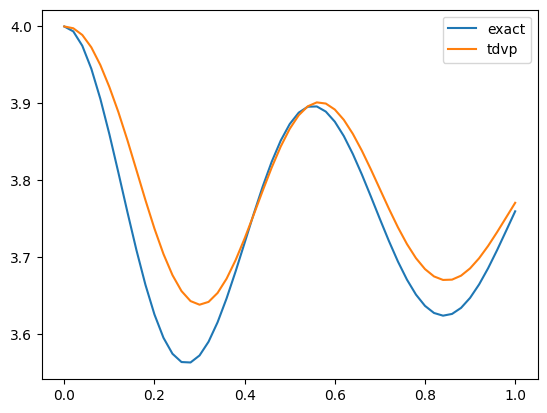

In [38]:
oc_exact, times = system.spatial_correlation_function_results(evaluation_time=2,
                                                              results=result,
                                                              distance=2,
                                                              mode = "HV")
plt.plot(times, oc_exact, label="exact")
plt.plot(times ,tdvp.operator_results()[0], label="tdvp")


plt.legend()

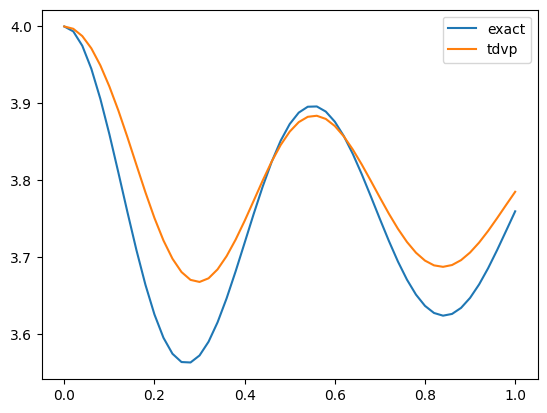

In [43]:
oc_exact, times = system.spatial_correlation_function_results(evaluation_time=2,
                                                              results=result,
                                                              distance=2,
                                                              mode = "HV")
plt.plot(times, oc_exact, label="exact")
plt.plot(times ,tdvp.operator_results()[0], label="tdvp")

plt.legend()

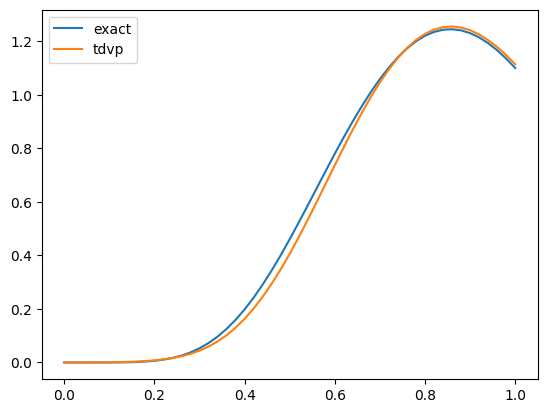

In [87]:
oc_exact, times = system.total_magnetization_results(evaluation_time=2,
                                                              results=result,)
plt.plot(times, oc_exact, label="exact")
plt.plot(times ,tdvp.operator_results()[1], label="tdvp")


plt.legend()

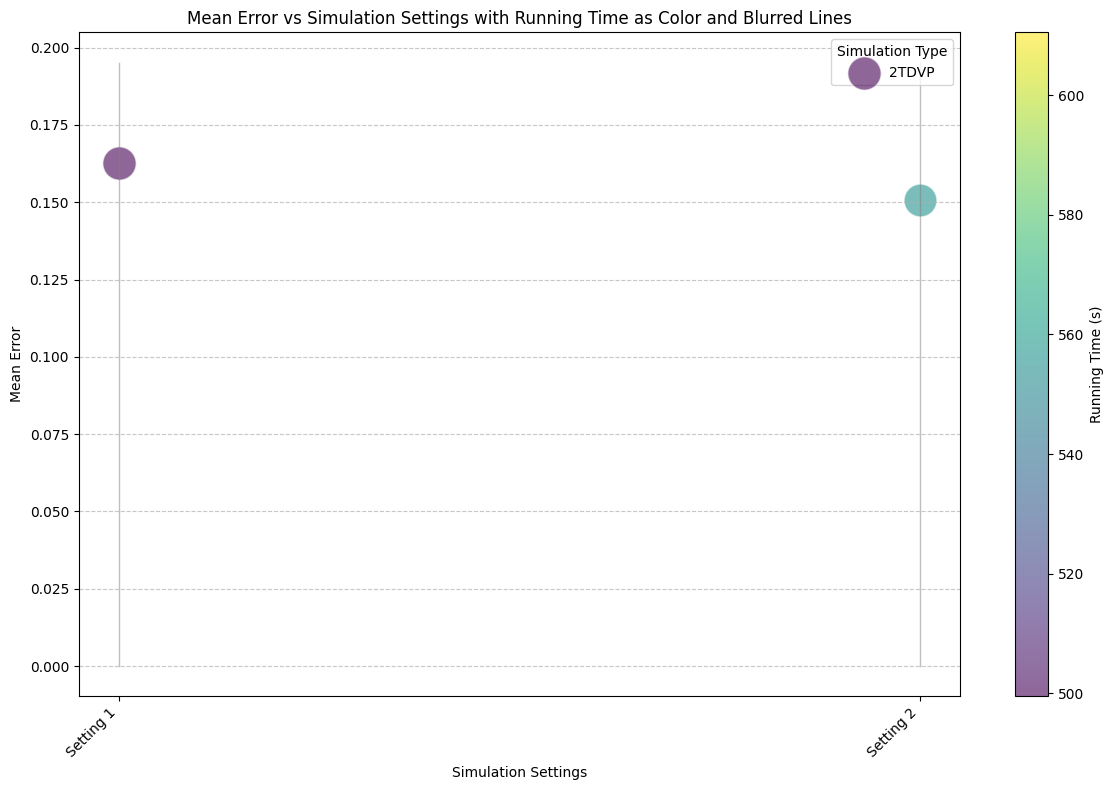

In [117]:
import matplotlib.pyplot as plt
import numpy as np

def plot_simulation_results(exact_solution, simulation_data):
    """
    Generate a bubble plot to visualize mean error vs simulation settings with blurred lines for each simulation type.

    Parameters:
    - exact_solution: np.ndarray, the exact solution values.
    - simulation_data: dict, where each key corresponds to a simulation setting name and value contains:
        - 'types': list of str, types of simulations (e.g., ["2TDVP", "GSE-1TDVP"])
        - 'running_times': list of float, running times corresponding to each type
        - 'results': list of list of np.ndarray, results for each simulation type

    Returns:
    - None: Displays the plot.
    """
    labels = []
    mean_errors = []
    variances = []
    running_times = []
    types = []
    x_positions = []

    current_x = 0
    for setting, data in simulation_data.items():
        for sim_type, running_time, results in zip(data['types'], data['running_times'], data['results']):
            # Ensure results and exact_solution have matching shapes
            results = np.array(results).real
            exact_solution = exact_solution.real

            if results.shape != exact_solution.shape:
                raise ValueError(f"Shape mismatch: results shape {results.shape} and exact_solution shape {exact_solution.shape} must match.")
            
            labels.append(f"{setting} ({sim_type})")
            x_positions.append(current_x)
            types.append(sim_type)
            running_times.append(running_time)

            # Calculate aggregated errors and variances
            errors = np.abs(results - exact_solution)
            mean_errors.append(np.mean(errors))
            variances.append(np.var(results))

        current_x += 1

    # Define marker types for simulation types
    marker_map = {'2TDVP': 'o', 'GSE-1TDVP': 's'}

    # Bubble plot with distinct markers
    plt.figure(figsize=(12, 8))
    for i, (x, sim_type, running_time) in enumerate(zip(x_positions, types, running_times)):
        plt.scatter(
            x, mean_errors[i], 
            s=variances[i] * 500, 
            c=[running_time], 
            cmap='viridis', 
            alpha=0.6, 
            edgecolors="w", 
            linewidth=1, 
            marker=marker_map[sim_type],
            label=sim_type if sim_type not in plt.gca().get_legend_handles_labels()[1] else None  # Add legend once per type
        )

    # Determine y-axis range
    max_y = max(mean_errors) * 1.2  # Extend slightly above maximum error

    # Add blur lines
    for i, (x, sim_type) in enumerate(zip(x_positions, types)):
        linestyle = '-' if sim_type == '2TDVP' else '--'
        plt.plot([x, x], [0, max_y], alpha=0.5, color='gray', linewidth=1, linestyle=linestyle)

    # Add labels
    plt.xticks(range(len(simulation_data)), simulation_data.keys(), rotation=45, ha='right')
    plt.colorbar(label="Running Time (s)")
    plt.legend(title="Simulation Type", loc='upper right')

    plt.xlabel("Simulation Settings")
    plt.ylabel("Mean Error")
    plt.title("Mean Error vs Simulation Settings with Running Time as Color and Blurred Lines")
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Usage Example
exact_solution = oc_exact

simulation_data = {
    'Setting 1': {
        'types': ['2TDVP', 'GSE-1TDVP'],
        'running_times': [420, 0.9],
        'results': [
            np.load(r'C:\Users\edpou\Desktop\Ed\PyTreeNet-Project_09\PyTreeNet\17.npz')["operator0results"],
        ],
    },
    'Setting 2': {
        'types': ['2TDVP', 'GSE-1TDVP'],
        'running_times': [555, 0.8],
        'results': [
            np.load(r'C:\Users\edpou\Desktop\Ed\PyTreeNet-Project_09\PyTreeNet\48_555.npz')["operator0results"],
        ],
    },
}

plot_simulation_results(exact_solution, simulation_data)


In [106]:
np.load(r'C:\Users\edpou\Desktop\Ed\PyTreeNet-Project_09\PyTreeNet\48_9.npz')["operator0results"]

array([4.        +0.00000000e+00j, 3.99262035+2.77555756e-17j,
       3.96294758+0.00000000e+00j, 3.90837048+0.00000000e+00j,
       3.83034189+0.00000000e+00j, 3.73112294+0.00000000e+00j,
       3.61232364-2.77555756e-17j, 3.47289557-5.55111512e-17j,
       3.31589937-1.38777878e-17j, 3.14545977+1.52655666e-16j,
       2.96594627+6.38378239e-16j, 2.78160926+0.00000000e+00j,
       2.59744969+2.22044605e-16j, 2.41541594-1.22124533e-15j,
       2.2385839 +0.00000000e+00j, 2.06960242+1.11022302e-16j,
       1.91052486+0.00000000e+00j, 1.76252867-4.44089210e-16j,
       1.62605046+0.00000000e+00j, 1.50202246+0.00000000e+00j,
       1.39080755+1.66533454e-16j, 1.29242848-2.22044605e-16j,
       1.2066566 -1.66533454e-16j, 1.13374852+3.88578059e-16j,
       1.07327347-1.11022302e-16j, 1.02470911+2.22044605e-16j,
       0.98745874-3.88578059e-16j, 0.96082106+5.55111512e-17j,
       0.943944  +2.77555756e-17j, 0.93568283+2.77555756e-17j,
       0.93518177+2.77555756e-17j, 0.94139423+2.7755575

In [107]:
oc_exact

array([0.00000000e+00, 7.89906399e-09, 5.14825827e-07, 5.80990605e-06,
       3.20738028e-05, 1.19533693e-04, 3.46918804e-04, 8.46055555e-04,
       1.81438062e-03, 3.52325814e-03, 6.32084301e-03, 1.06275323e-02,
       1.69250679e-02, 2.57382197e-02, 3.76102321e-02, 5.30749861e-02,
       7.26253009e-02, 9.66828809e-02, 1.25569327e-01, 1.59480711e-01,
       1.98470509e-01, 2.42438689e-01, 2.91132607e-01, 3.44149054e-01,
       4.00951156e-01, 4.60890680e-01, 5.23230467e-01, 5.87169378e-01,
       6.51875760e-01, 7.16508173e-01, 7.80237132e-01, 8.42266527e-01,
       9.01846488e-01, 9.58282872e-01, 1.01094475e+00, 1.05926871e+00,
       1.10276087e+00, 1.14099866e+00, 1.17363097e+00, 1.20037865e+00,
       1.22103718e+00, 1.23547512e+00, 1.24363430e+00, 1.24553339e+00,
       1.24126671e+00, 1.23100162e+00, 1.21498077e+00, 1.19352183e+00,
       1.16701046e+00, 1.13590092e+00, 1.10071333e+00])

In [105]:
    'Setting 2': {
        'types': ['2TDVP', 'GSE-1TDVP'],
        'running_times': [0.6, 0.8],
        'results': [
            [exact_solution + np.random.normal(0, 0.15, len(time))],
            [exact_solution + np.random.normal(0, 0.25, len(time))]
        ]
    }

SyntaxError: illegal target for annotation (1415526650.py, line 1)